## Descubra o preço das casas dado as suas características

Vamos usar um dataset bem popular de preço de casas em Ames (Iowa) nos EUA. Esse dataset é bem completo contendo mais de 80 colunas, sendo várias delas categóricas.

As suas features/colunas são:

Para você saber a descrição e os valores de cada coluna você pode clicar nesse [link](https://databootcamp.nyc3.digitaloceanspaces.com/house_prices_data_description.txt).

In [81]:
import pandas
houses = pandas.read_csv("https://databootcamp.nyc3.digitaloceanspaces.com/house_prices.csv")

In [82]:
pandas.set_option('display.max_columns', None)

In [83]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Qual a média e mediana do preço das casas (`SalePrice`)?

In [84]:
houses.SalePrice.median()

163000.0

In [85]:
houses.SalePrice.mean()

180921.19589041095

## Ter ou não piscina na casa tem alguma correlação com a quantidade de quartos?

In [86]:
houses.corr("spearman").PoolArea['BedroomAbvGr']

# Parece que não muito

0.07173429625585229

## Faça uma análise sobre a relação de preço por bairro (`Neighborhood`)?
Uma dica: Box Plots e Scatter Plot são bem legais de usar nesse caso

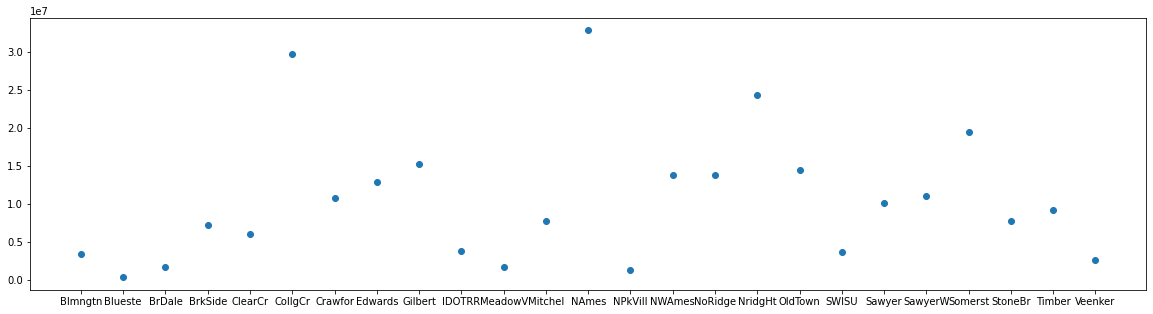

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
grafico = houses.groupby("Neighborhood")["SalePrice"].sum().to_frame().reset_index()

plt.figure(figsize=(20,5))
plt.scatter(grafico.Neighborhood, grafico.SalePrice)
plt.show()

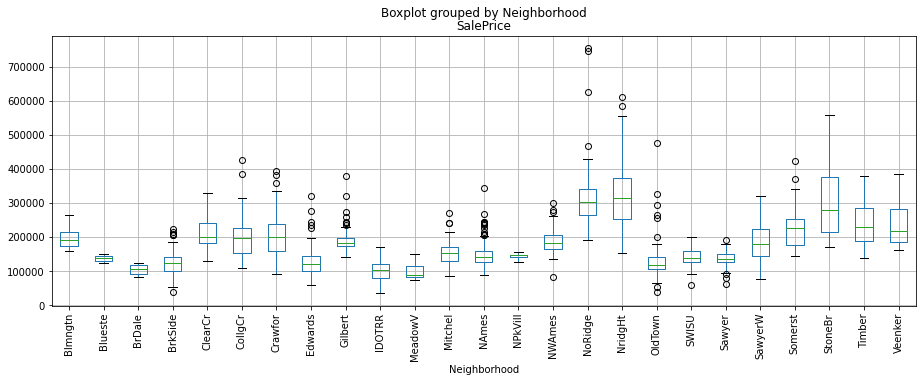

In [103]:
houses.boxplot('SalePrice', by='Neighborhood', rot =90, figsize=(15,5))

## Qual bairro tem as casas com maior tamanho (`GrLivArea`)?
Valores médio? Quartis superiores? Qual desses vocês usariam?

In [89]:
casa_grande = houses.groupby("Neighborhood")["GrLivArea"].mean().to_frame().reset_index()
casa_grande.sort_values("GrLivArea", ascending=False).head(1)

,Neighborhood,GrLivArea
15,NoRidge,2508.853659


In [90]:
casa_grande.describe()

,GrLivArea
count,25.000000
mean,1531.018359
std,324.345378
min,1058.941176
25%,1294.204082
50%,1480.500000
75%,1749.368421
max,2508.853659


## Quais características que levam algumas casas de qualidade (`OverallQual`) mais baixas terem preço maiores que de outras de outra com nota de qualidade maior?

## A distribuição dos preços das casas segue uma distribuição normal?

180921.19589041095
163000.0
79442.50288288663


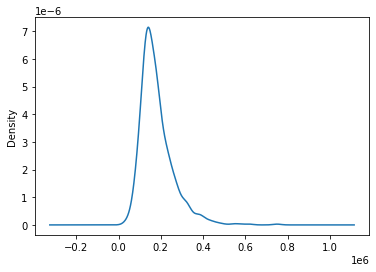

In [99]:
print(houses.SalePrice.mean())
print(houses.SalePrice.median())
print(houses.SalePrice.std())
houses.SalePrice.plot.kde()

# não é normal

## Quais as 3 principais características que elevam o preço de uma casa?

In [106]:
houses.corr().SalePrice.sort_values(ascending=False).head(4)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64

## Como você diria que o preço da casa está justa?

In [ ]:
houses["GarageCars"].head()

## Se a casa Y entrar nesse dataframe qual deveria ser o preço aproximado dela?
Casa Y
    - Bedroom: 2
    - GarageCars: 2
    - FullBath: 1
    - GrLivArea: 100